# Code for the Video Titled: The problem with Gradient Descent

# Dependencies

Using the following packages:
- [Manim](https://www.manim.community/): Maths Animations
- [Matplotlib](https://matplotlib.org/): For plotting the results
- [NumPy](https://numpy.org/): Basic Linear Algebra support (if needed)

In [3]:
from manim import *
import numpy as np
import matplotlib.pyplot as plt

config.disable_caching = True

# Synthetic Dataset

Simulating the meteorite falling!

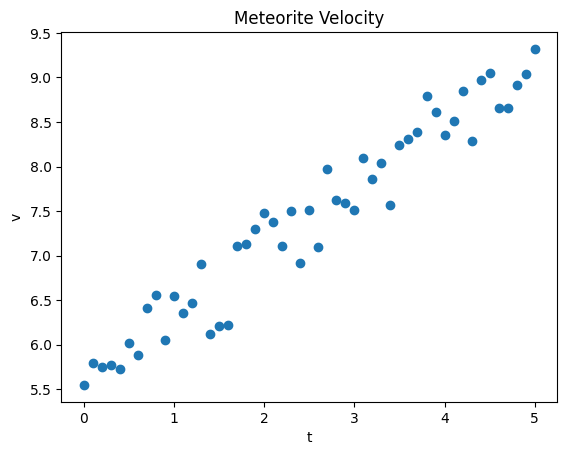

In [5]:
np.random.seed(0)

v0 = 5
a = 0.75

t = np.arange(0, 5.1, 0.1)

v = lambda t: v0 + a*t + np.random.rand(len(t))
v = v(t)
data = np.vstack((t, v)).T

plt.scatter(data[:,0], data[:,1])
plt.xlabel("t")
plt.ylabel("v")
plt.title("Meteorite Velocity")
plt.show()

# Vanilla Gradient Descent

EPOCH 0; MSE 52.911637410853956
EPOCH 1; MSE 38.3088615354
EPOCH 2; MSE 27.980295334256624
EPOCH 3; MSE 20.650920600272663
EPOCH 4; MSE 15.428334034417992
EPOCH 5; MSE 11.687718835453179
EPOCH 6; MSE 8.991417658540938
EPOCH 7; MSE 7.032696803753558
EPOCH 8; MSE 5.596423647117774
EPOCH 9; MSE 4.531569076760663
EPOCH 10; MSE 3.7319775961195023
EPOCH 11; MSE 3.122918040848842
EPOCH 12; MSE 2.6516761162342233
EPOCH 13; MSE 2.280973088558961
EPOCH 14; MSE 1.9843606952075914
EPOCH 15; MSE 1.742998031378667
EPOCH 16; MSE 1.5433949343160605
EPOCH 17; MSE 1.3758313655148664
EPOCH 18; MSE 1.2332496696197601
EPOCH 19; MSE 1.110477679004908
EPOCH 20; MSE 1.0036833446554776
EPOCH 21; MSE 0.909991436551308
EPOCH 22; MSE 0.8272137361380657
EPOCH 23; MSE 0.7536587423664339
EPOCH 24; MSE 0.6879971207117955
EPOCH 25; MSE 0.6291662625720992
EPOCH 26; MSE 0.5763023140396661
EPOCH 27; MSE 0.5286915239429374
EPOCH 28; MSE 0.4857352026805126
EPOCH 29; MSE 0.44692429133092365
EPOCH 30; MSE 0.41182073547422077

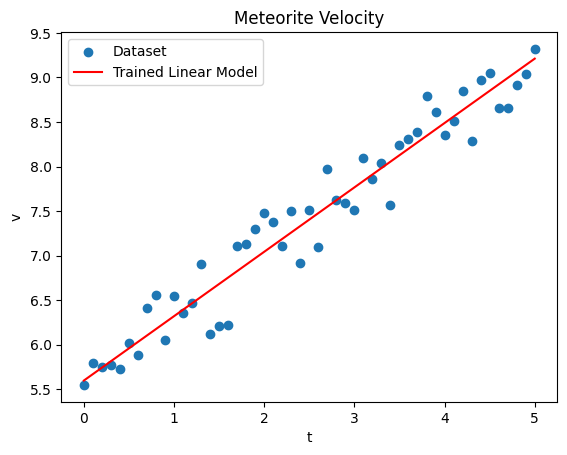

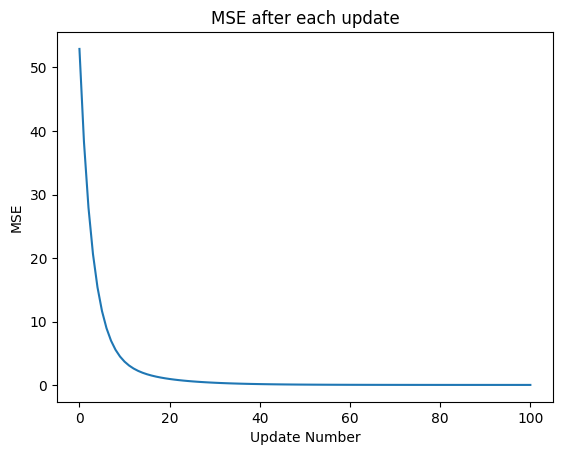

In [8]:
np.random.seed(0)

# Separating x and y
x = data[:,0]
y = data[:,1]

# Lists to store parameters and mse values after each update
w_vals = []
b_vals = []
mse_vals = []

# MSE Loss Function
def mse_loss(pred, y):
    return np.sum((pred-y)**2, axis=0)/len(y)

# Linear Model
def linear_model(x, w, b):
    return x*w + b

# Number of updates to be performed
EPOCHS = 100
# Step length
alpha = 0.1

# Initialising weight and bias randomly
w = np.random.rand()*0.1
b = np.random.rand()*0.1
w_vals.append(w)
b_vals.append(b)

# Making first prediction
pred = linear_model(x, w, b)
L = mse_loss(pred, y)
mse_vals.append(L)
print("EPOCH {}; MSE {}".format(0, L))

for i in range(1, EPOCHS+1):
    pred = linear_model(x, w, b)
    L = mse_loss(pred, y)
    
    # Calculating partial derivatives
    dL_dw = 2/len(y) * (np.sum((pred-y)*x, axis=0))
    dL_db = 2/len(y) * (np.sum((pred-y), axis=0))

    # Gradient Descent Update
    w_new = w - alpha*dL_dw
    b_new = b - alpha*dL_db
    w_vals.append(w_new)
    b_vals.append(b_new)

    w = w_new
    b = b_new

    print("EPOCH {}; MSE {}".format(i, mse_loss(linear_model(x,w,b), y)))
    mse_vals.append(mse_loss(linear_model(x,w,b), y))


plt.scatter(data[:,0], data[:,1], label="Dataset")
plt.xlabel("t")
plt.ylabel("v")
plt.title("Meteorite Velocity")
plt.plot(data[:,0], linear_model(data[:,0], w, b), label="Trained Linear Model", color="r")
plt.legend()
plt.show()

plt.title("MSE after each update")
plt.plot(mse_vals)
plt.xlabel("Update Number")
plt.ylabel("MSE")
plt.show()

## Manim Visualisation of the above linear model training

**THIS WILL TAKE SOME TIME TO RENDER!!**

In [ ]:
%%manim -ql -v WARNING GradientDescent2D_3D

class GradientDescent2D_3D(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=1, theta=-1., zoom=1)
        np.random.seed(0)

        # 3D Axis
        ax = ThreeDAxes(x_range=[-0.25, 5], y_range=[-1, 10], z_range=[0, 60]).scale(0.5).move_to(ORIGIN).shift(UP)
        x_label = ax.get_x_axis_label(Tex("w", color=YELLOW).scale(2))
        y_label = ax.get_y_axis_label(Tex("b", color=YELLOW).scale(2))
        self.play(FadeIn(ax), FadeIn(x_label), FadeIn(y_label))
        self.wait(2)

        # Planting 3d dots
        np.random.seed(0)
        linear = lambda w, b: lambda x: w * x + b

        surface = Surface(
            lambda u, v: ax.c2p(u, v, 1/len(data)*np.sum((linear(u, v)(data[:,0])-data[:,1])**2)),
            u_range=[-0.25, 5],
            v_range=[-1, 10],
            resolution=25,
        )
        surface.set_style(fill_opacity=0.75)
        surface.set_fill_by_value(axes=ax, colorscale=[(RED, 0.2), (YELLOW, 2), (GREEN, 20)], axis=2)
        self.play(Create(surface))
        
        self.wait(2) 

        dot = Dot3D(ax.c2p(w_vals[0], b_vals[0], mse_vals[0]), radius=0.05, color=MAROON)
        self.play(Create(dot))
        lines = []
        for i in range(1, 20+1):
            self.play(dot.animate.move_to(ax.c2p(w_vals[i], b_vals[i], mse_vals[i])))
            line = Line3D((ax.c2p(w_vals[i-1], b_vals[i-1], mse_vals[i-1])), (ax.c2p(w_vals[i], b_vals[i], mse_vals[i])), color=MAROON)
            self.play(Write(line))
            lines.append(line)
            self.wait(1)
        i = -1
        self.play(dot.animate.move_to(ax.c2p(w_vals[i], b_vals[i], mse_vals[i])))
        line = Line3D((ax.c2p(w_vals[21], b_vals[21], mse_vals[21])), (ax.c2p(w_vals[i], b_vals[i], mse_vals[i])), color=MAROON)
        self.play(Write(line))
        lines.append(line)

        self.begin_ambient_camera_rotation(rate=0.15)
        self.wait(25)
        self.stop_ambient_camera_rotation()

        # FadeOut everything
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        

# Gradient Descent with Momentum

EPOCH 0; MSE 52.911637410853956
EPOCH 1; MSE 6.304750092758184
EPOCH 2; MSE 15.116796095168972
EPOCH 3; MSE 9.437267241246023
EPOCH 4; MSE 4.785074127685865
EPOCH 5; MSE 5.768200898743134
EPOCH 6; MSE 4.153055513420815
EPOCH 7; MSE 3.576175694632566
EPOCH 8; MSE 3.3591076359448517
EPOCH 9; MSE 2.8723639082098242
EPOCH 10; MSE 2.6144952612703123
EPOCH 11; MSE 2.3668895495694464
EPOCH 12; MSE 2.1240276241464833
EPOCH 13; MSE 1.9293794961177142
EPOCH 14; MSE 1.7462610368687908
EPOCH 15; MSE 1.5816945352750724
EPOCH 16; MSE 1.4354736801730654
EPOCH 17; MSE 1.3022156572963093
EPOCH 18; MSE 1.182388740736735
EPOCH 19; MSE 1.0743184508115677
EPOCH 20; MSE 0.9766116635933009
EPOCH 21; MSE 0.8884882588083763
EPOCH 22; MSE 0.8089142429215704
EPOCH 23; MSE 0.7370626318870023
EPOCH 24; MSE 0.6722026960117883
EPOCH 25; MSE 0.6136395123248328
EPOCH 26; MSE 0.5607659455335811
EPOCH 27; MSE 0.5130297184930713
EPOCH 28; MSE 0.4699301075308967
EPOCH 29; MSE 0.43101757153828624
EPOCH 30; MSE 0.3958851448

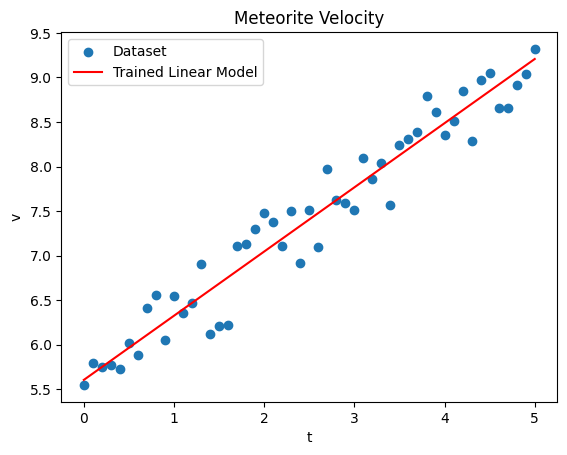

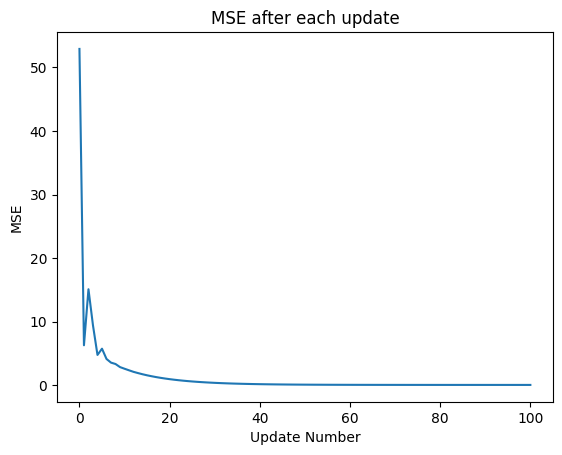

In [10]:
np.random.seed(0)

# Separating x and y
x = data[:,0]
y = data[:,1]

# Lists to store parameters and mse values after each update
w_vals = []
b_vals = []
mse_vals = []

# MSE Loss Function
def mse_loss(pred, y):
    return np.sum((pred-y)**2, axis=0)/len(y)

# Linear Model
def linear_model(x, w, b):
    return x*w + b

# Number of updates to be performed
EPOCHS = 100
# Step length
alpha = 0.1
# Weightage to the previous update
beta = 0.5

# Initialising weight and bias randomly
w = np.random.rand()*0.1
b = np.random.rand()*0.1
w_vals.append(w)
b_vals.append(b)

# Making first prediction
pred = linear_model(x, w, b)
L = mse_loss(pred, y)
mse_vals.append(L)
print("EPOCH {}; MSE {}".format(0, L))

V_dL_dw = 0
V_dL_db = 0
for i in range(1, EPOCHS+1):
    pred = linear_model(x, w, b)
    L = mse_loss(pred, y)
    
    # Calculating partial derivatives
    dL_dw = 2/len(y) * (np.sum((pred-y)*x, axis=0))
    dL_db = 2/len(y) * (np.sum((pred-y), axis=0))

    # Calculating weighted partial derivatives
    V_dL_dw = beta*V_dL_dw + (1-beta)*dL_dw
    V_dL_db = beta*V_dL_db + (1-beta)*dL_db

    # Gradient Descent with Momentum
    w_new = w - alpha*V_dL_dw
    b_new = b - alpha*V_dL_db
    w_vals.append(w_new)
    b_vals.append(b_new)

    w = w_new
    b = b_new

    print("EPOCH {}; MSE {}".format(i, mse_loss(linear_model(x,w,b), y)))
    mse_vals.append(mse_loss(linear_model(x,w,b), y))

plt.scatter(data[:,0], data[:,1], label="Dataset")
plt.xlabel("t")
plt.ylabel("v")
plt.title("Meteorite Velocity")
plt.plot(data[:,0], linear_model(data[:,0], w, b), label="Trained Linear Model", color="r")
plt.legend()
plt.show()

plt.title("MSE after each update")
plt.plot(mse_vals)
plt.xlabel("Update Number")
plt.ylabel("MSE")
plt.show()

## Manim Visualisation of the above linear model training

**THIS WILL TAKE SOME TIME TO RENDER!!**

In [ ]:
%%manim -ql -v WARNING Momentum_3D

class Momentum_3D(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=1, theta=-1., zoom=1)
        np.random.seed(0)

        # 3D Axis
        ax = ThreeDAxes(x_range=[-0.25, 5], y_range=[-1, 10], z_range=[0, 60]).scale(0.5).move_to(ORIGIN).shift(UP)
        x_label = ax.get_x_axis_label(Tex("w", color=YELLOW).scale(2))
        y_label = ax.get_y_axis_label(Tex("b", color=YELLOW).scale(2))
        self.play(FadeIn(ax), FadeIn(x_label), FadeIn(y_label))
        self.wait(2)

        # Planting 3d dots
        np.random.seed(0)
        linear = lambda w, b: lambda x: w * x + b

        surface = Surface(
            lambda u, v: ax.c2p(u, v, 1/len(data)*np.sum((linear(u, v)(data[:,0])-data[:,1])**2)),
            u_range=[-0.25, 5],
            v_range=[-1, 10],
            resolution=25,
        )
        surface.set_style(fill_opacity=0.75)
        surface.set_fill_by_value(axes=ax, colorscale=[(RED, 0.2), (YELLOW, 2), (GREEN, 20)], axis=2)
        self.play(Create(surface))
        
        self.wait(3) 

        dot = Dot3D(ax.c2p(w_vals[0], b_vals[0], mse_vals[0]), radius=0.05, color=MAROON)
        self.play(Create(dot))
        lines = []
        for i in range(1, 20+1):
            self.play(dot.animate.move_to(ax.c2p(w_vals[i], b_vals[i], mse_vals[i])))
            line = Line3D((ax.c2p(w_vals[i-1], b_vals[i-1], mse_vals[i-1])), (ax.c2p(w_vals[i], b_vals[i], mse_vals[i])), color=MAROON)
            self.play(Write(line))
            lines.append(line)
        i = -1
        self.play(dot.animate.move_to(ax.c2p(w_vals[i], b_vals[i], mse_vals[i])))
        line = Line3D((ax.c2p(w_vals[21], b_vals[21], mse_vals[21])), (ax.c2p(w_vals[i], b_vals[i], mse_vals[i])), color=MAROON)
        self.play(Write(line))
        lines.append(line)

        self.begin_ambient_camera_rotation(rate=0.15)
        self.wait(25)
        self.stop_ambient_camera_rotation()

        # FadeOut everything
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )